<Figure size 1000x600 with 0 Axes>

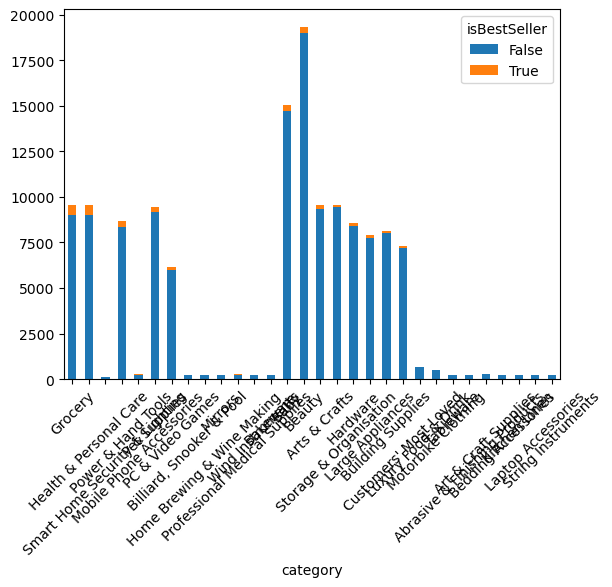

In [76]:
# PART 1 :

import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

url = r"C:\Users\Marie-Laure\Desktop\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)

# 1.1
cross_tab = pd.crosstab(df["category"], df["isBestSeller"])
cross_tab["freq_true"] = round(cross_tab[True] / (cross_tab[False] + cross_tab[True]) , 2)
cross_tab = cross_tab.sort_values(by=["freq_true", True], ascending=False)
cross_tab

# 1.2

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(cross_tab)

# grande différence entre les valeurs observées et attendues : 36708
# dépendance entre les deux variables validé
# p < 0.05 donc relation entre les deux variables, p =v0.0

cross_tab = cross_tab.drop(columns={"freq_true"})
v = association(cross_tab, method="cramer")

# v = 0.12 => près de ne pas avoir d'association

#1.3
cross_tab = cross_tab.head(30)
plt.figure(figsize=(10,6))
cross_tab.plot(kind="bar", stacked=True)
plt.xticks(rotation=45)
plt.show()


C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2574281204.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df1.groupby('category').apply(mark_outliers)
C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2574281204.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2_cleaned, x='category', y='price', palette="coolwarm")


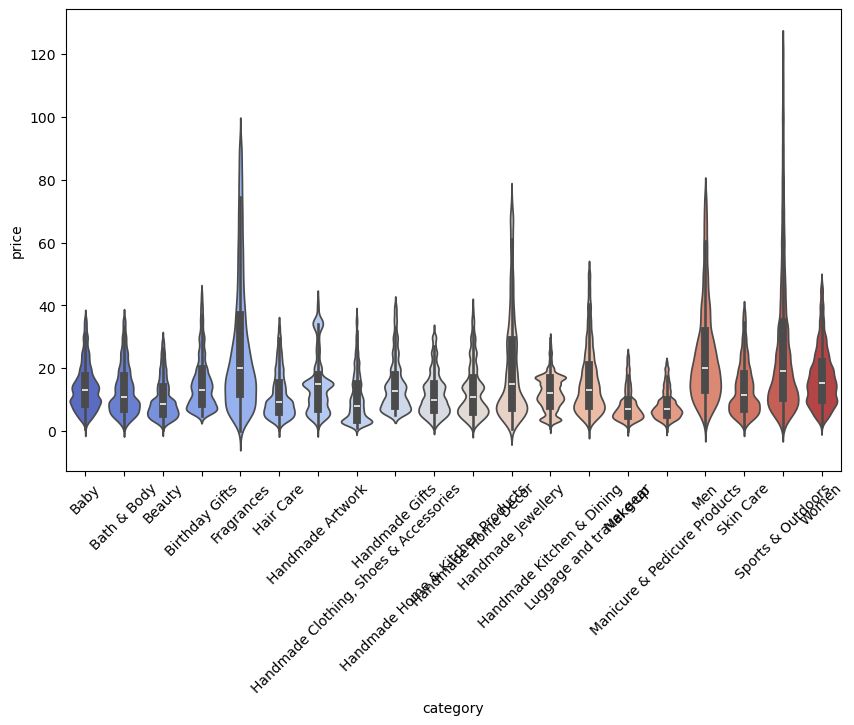

In [184]:
import pandas as pd

# Étape 1 : Filtrer les catégories les plus fréquentes
df1 = df[["price", "category"]]
top_categories = df1["category"].value_counts().head(20).index
df1 = df1[df1["category"].isin(top_categories)]

# Étape 2 : Détecter et marquer les outliers
def mark_outliers(group):
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    max_q3 = q3 + 1.5 * iqr
    min_q1 = q1 - 1.5 * iqr
    
    # Marquer les outliers
    group['is_outlier'] = (group['price'] > max_q3) | (group['price'] < min_q1)
    return group

# Appliquer la fonction sur chaque catégorie
df2 = df1.groupby('category').apply(mark_outliers)

# Étape 3 : Supprimer les outliers
df2_cleaned = df2[~df2['is_outlier']].drop(columns=['is_outlier'])


plt.figure(figsize=(10,6))
sns.violinplot(data=df2_cleaned, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45)
plt.show()



C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2678802730.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x='category', y='price', palette="coolwarm")


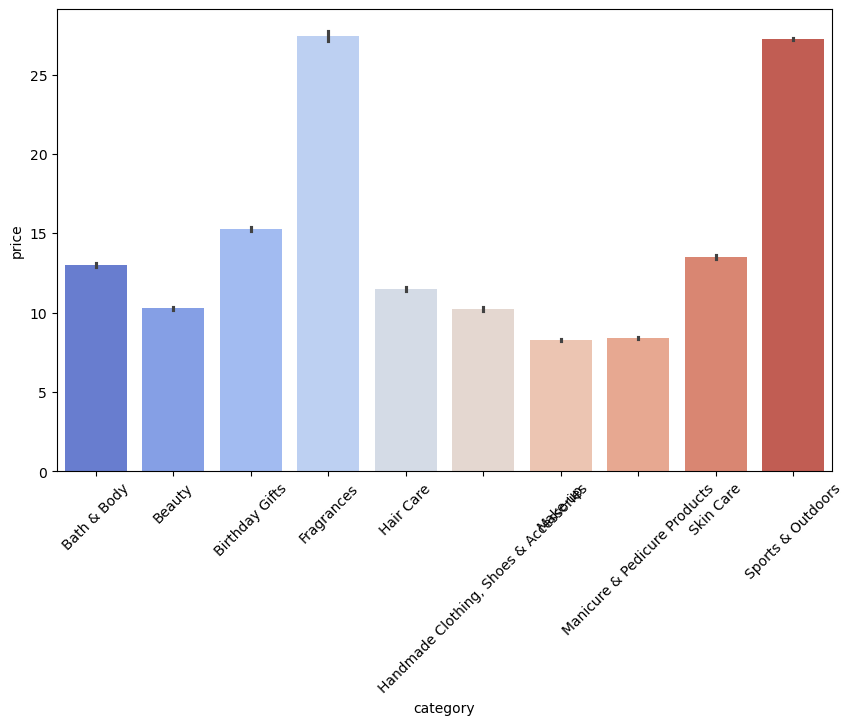

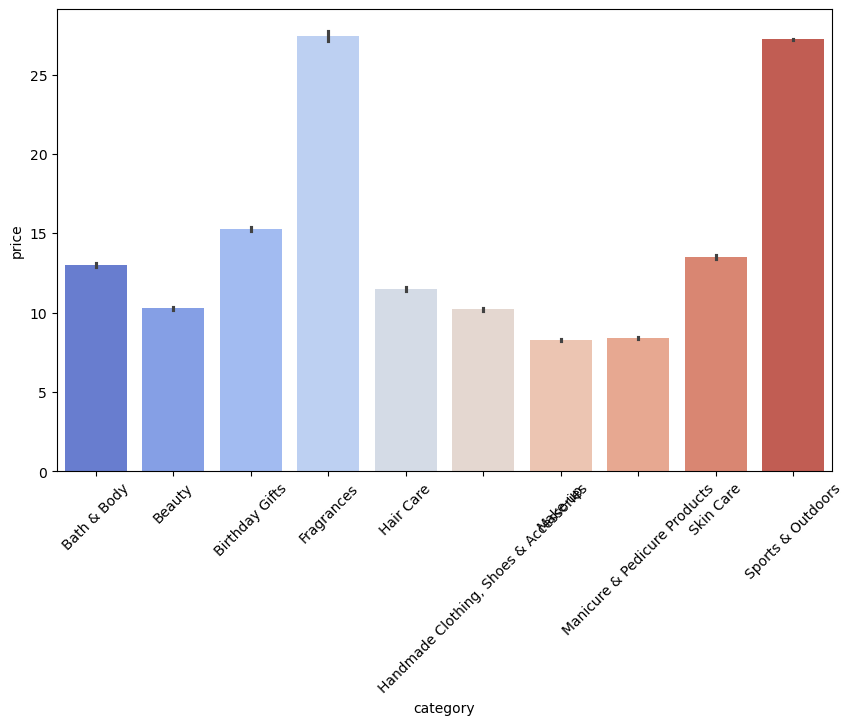

In [200]:
#2
top_categories = df2_cleaned["category"].value_counts().head(10).index
df3 = df2_cleaned[df2_cleaned["category"].isin(top_categories)]

plt.figure(figsize=(10,6))
sns.barplot(data=df3, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


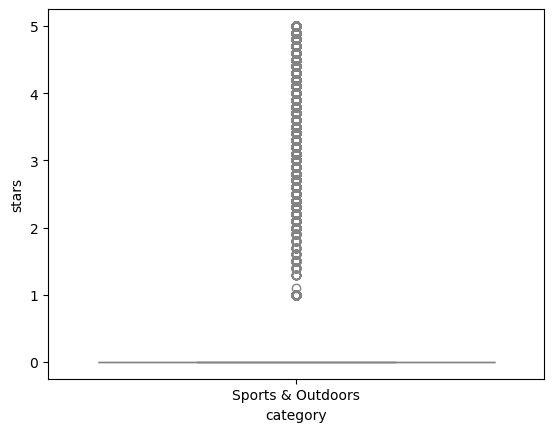

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


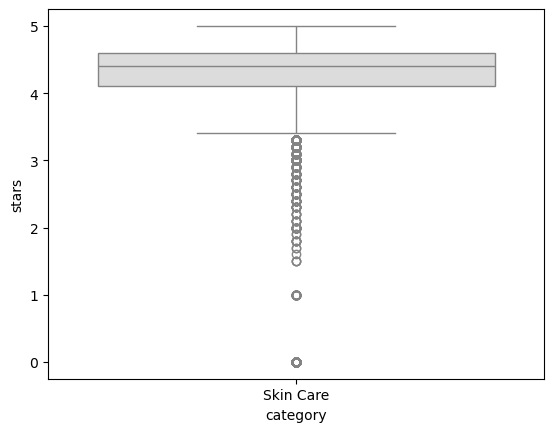

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


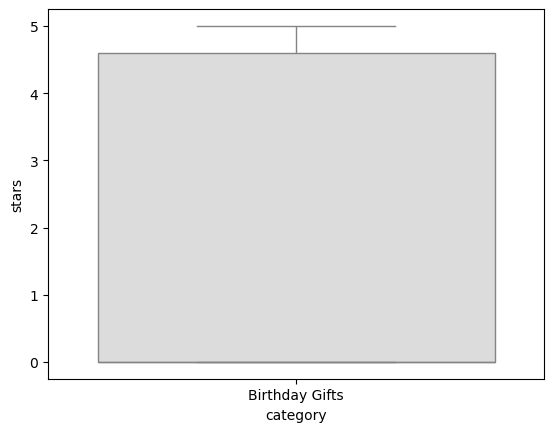

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


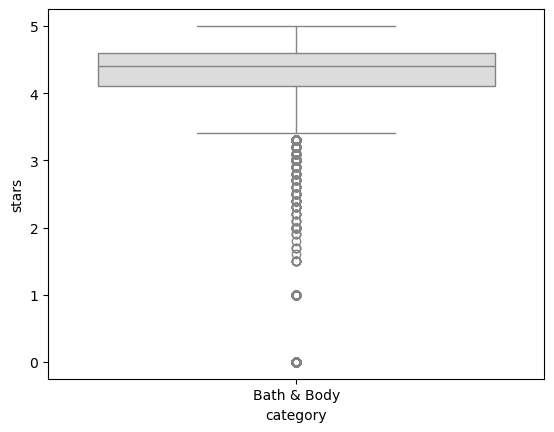

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


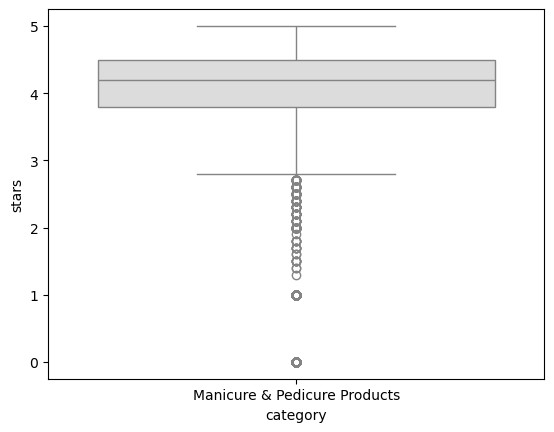

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


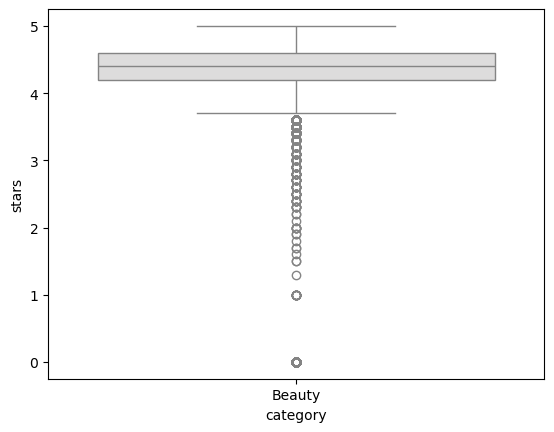

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


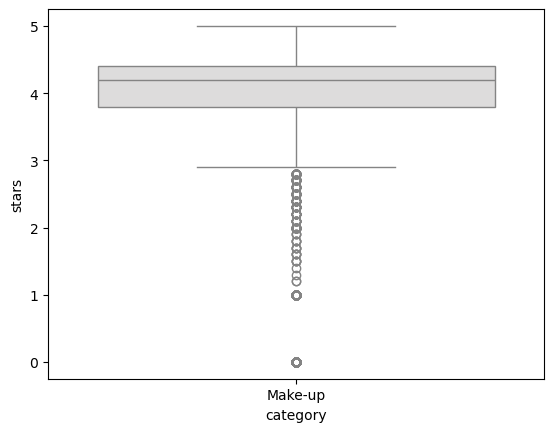

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


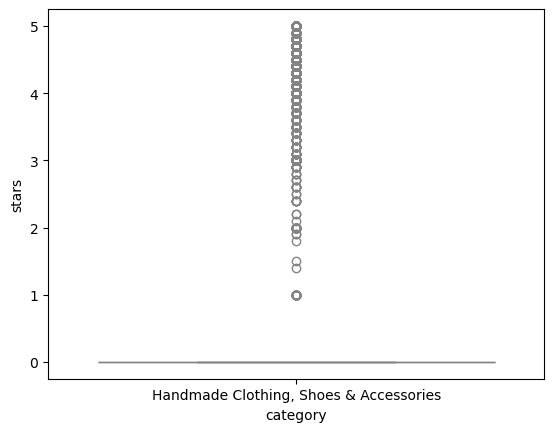

C:\Users\Marie-Laure\AppData\Local\Temp\ipykernel_7216\2700510394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")


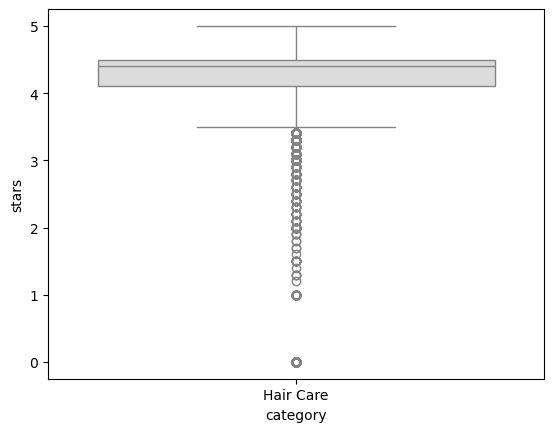

In [252]:
#3
df4 = df[["stars", "category"]]
top_ten = df4["category"].value_counts().head(9).index
df4 = df4[df4["category"].isin(top_ten)]

diff_cat = df4["category"].unique()

for category in diff_cat:
    dfx = df4[df4["category"] == category]
    sns.boxplot(data=dfx, x='category', y='stars', palette="coolwarm")
    plt.show()


In [318]:
df5

,price,stars
0,21.99,4.7
1,23.99,4.7
2,21.99,4.7
3,31.99,4.7
4,17.99,4.6
...,...,...
2443646,22.34,0.0
2443647,97.99,0.0
2443648,52.99,0.0
2443649,79.99,4.3


In [447]:
# Part 3
import statsmodels.api as sm

df5 = df[["price", "stars"]]

def remove_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    mini = q1 - 1.5 * iqr
    maxi = q3 + 1.5 * iqr

    # Filtrer les valeurs dans l'intervalle accepté
    return col[(col > mini) & (col < maxi)]

# Appliquer la suppression des outliers sur chaque colonne
outliers_cleaned = df5.apply(remove_outliers)

# Réindexer pour un DataFrame propre après suppression des NaN
outliers_cleaned = outliers_cleaned.dropna().reset_index(drop=True)

outliers_cleaned

,price,stars
0,21.99,4.7
1,23.99,4.7
2,21.99,4.7
3,31.99,4.7
4,17.99,4.6
...,...,...
2443646,22.34,0.0
2443647,97.99,0.0
2443648,52.99,0.0
2443649,79.99,4.3


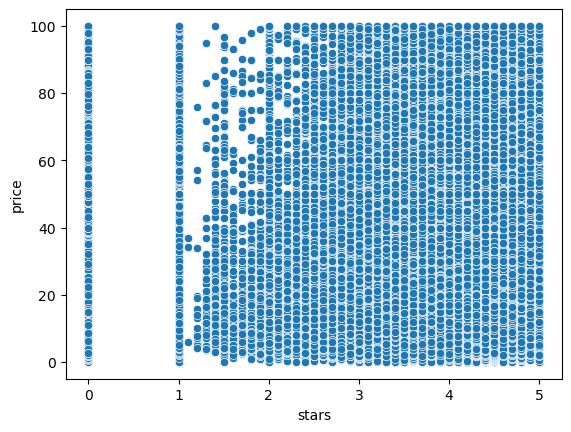

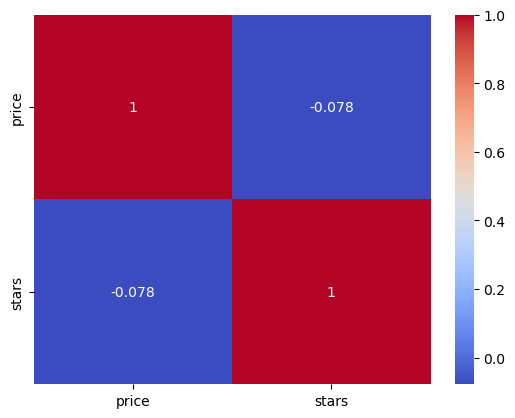

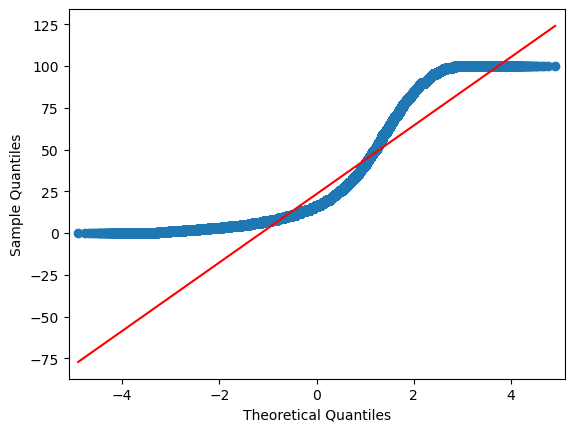

In [449]:

#1
correlation = outliers_cleaned['price'].corr(df['stars']) #-0.12
s_correlation = outliers_cleaned['price'].corr(df['stars'], method='spearman') # -0.13

#2
sns.scatterplot(outliers_cleaned, x="stars", y="price")
plt.show()

correlation_matrix = outliers_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

sm.qqplot(outliers_cleaned['price'], line='s')
plt.show()